In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis'

# 1. Reading the Excel Files and Merging

In [3]:
city = pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\City.xlsx')
continent = pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\Continent.xlsx')
country = pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\Country.xlsx')
item = pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\Item.xlsx')
mode = pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\Mode.xlsx')
region = pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\Region.xlsx')
trans= pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\Transaction.xlsx')
type = pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\Type.xlsx')
user = pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\User.xlsx')
updated = pd.read_excel('c:\\Users\\Sai Krishnan\\OneDrive\\Desktop\\ML Program\\Tourism Analysis\\Additional_Data_for_Attraction_Sites\\Updated_Item.xlsx')

In [4]:
user_merged = user\
    .merge(continent,on='ContinentId',how='left')\
    .merge(region,on='RegionId',how='left')\
    .merge(country,on='CountryId',how='left')\
    .merge(city,on='CityId',how='left')

In [5]:
user_merged #final

,UserId,ContinentId_x,RegionId_x,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y
0,14,5,20,155,220.0,Europe,Southern Europe,5,Portugal,20,Lagos,27.0
1,16,3,14,101,3098.0,Asia,South East Asia,3,Indonesia,14,Jakarta,101.0
2,20,4,15,109,4303.0,Australia & Oceania,Australia,4,Australia,15,Gold Coast,109.0
3,23,1,4,22,154.0,Africa,Southern Africa,1,South Africa,4,Meyerton,22.0
4,25,3,14,101,3098.0,Asia,South East Asia,3,Indonesia,14,Jakarta,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33525,88179,5,21,162,7833.0,Europe,Western Europe,5,Netherlands,21,Rotterdam,162.0
33526,88185,3,12,80,2534.0,Asia,Middle East,3,Jordan,12,Amman,80.0
33527,88187,3,12,88,2604.0,Asia,Middle East,3,Turkey,12,Istanbul,88.0
33528,88189,5,17,131,6129.0,Europe,Central Europe,5,Romania,17,Bucharest,131.0


In [6]:
trans.rename(columns={'VisitMode':'VisitModeId'},inplace=True)
# why? check the transactions.xlsx sheet - Visit mode has been given in ID format

In [7]:
trans_merged = trans\
    .merge(item,how='left',on='AttractionId')\
    .merge(mode,how='left',on='VisitModeId')
trans_merged.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,VisitMode
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Couples
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Friends
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Family
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Family
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Couples


In [8]:
merged = trans_merged.merge(user_merged,on='UserId',how='left')

In [9]:
# Check Missing Values
merged.isna().sum()

TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
VisitModeId          0
AttractionId         0
Rating               0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
VisitMode            0
ContinentId_x        0
RegionId_x           0
CountryId_x          0
CityId               8
Continent            0
Region               0
ContinentId_y        0
Country              0
RegionId_y           0
CityName             8
CountryId_y          8
dtype: int64

In [10]:
merged

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,RegionId_x,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,21,163,4341.0,Europe,Western Europe,5,United Kingdom,21,Guildford,109.0
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,8,48,464.0,America,Northern America,2,Canada,8,Ontario,48.0
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,9,54,774.0,America,South America,2,Brazil,9,Brazil,51.0
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,17,135,583.0,Europe,Central Europe,5,Switzerland,17,Zurich,48.0
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,21,163,1396.0,Europe,Western Europe,5,United Kingdom,21,Manchester,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,21,159,7460.0,Europe,Western Europe,5,France,21,Lyon,159.0
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,17,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,17,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,17,133,6164.0,Europe,Central Europe,5,Slovakia,17,Bratislava Region,133.0


In [11]:
# Change the view month and Year into single column
merged['VisitDate'] = pd.to_datetime(merged['VisitYear'].astype(str)+'-'+merged['VisitMonth'].astype(str)+'-01')

In [12]:
merged.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y,VisitDate
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,163,4341.0,Europe,Western Europe,5,United Kingdom,21,Guildford,109.0,2022-10-01
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,48,464.0,America,Northern America,2,Canada,8,Ontario,48.0,2022-10-01
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,54,774.0,America,South America,2,Brazil,9,Brazil,51.0,2022-10-01
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,135,583.0,Europe,Central Europe,5,Switzerland,17,Zurich,48.0,2022-10-01
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,163,1396.0,Europe,Western Europe,5,United Kingdom,21,Manchester,51.0,2022-10-01


In [13]:
merged.dtypes

TransactionId                 int64
UserId                        int64
VisitYear                     int64
VisitMonth                    int64
VisitModeId                   int64
AttractionId                  int64
Rating                        int64
AttractionCityId              int64
AttractionTypeId              int64
Attraction                   object
AttractionAddress            object
VisitMode                    object
ContinentId_x                 int64
RegionId_x                    int64
CountryId_x                   int64
CityId                      float64
Continent                    object
Region                       object
ContinentId_y                 int64
Country                      object
RegionId_y                    int64
CityName                     object
CountryId_y                 float64
VisitDate            datetime64[ns]
dtype: object

In [14]:
#Checking Unique Values to spot typos
merged['CityName'].unique()

array(['Guildford', 'Ontario', 'Brazil', ..., 'Argentina', 'Binfield',
       'Bratislava Region'], dtype=object)

In [15]:
merged['VisitMode'].unique()

array(['Couples', 'Friends', 'Family', 'Solo', 'Business'], dtype=object)

In [16]:
merged['Attraction'].unique()

array(['Sacred Monkey Forest Sanctuary', 'Waterbom Bali',
       'Seminyak Beach', 'Nusa Dua Beach', 'Sanur Beach',
       'Uluwatu Temple', 'Tegalalang Rice Terrace',
       'Tegenungan Waterfall', 'Tanah Lot Temple', 'Kuta Beach - Bali',
       'Bromo Tengger Semeru National Park', 'Mount Semeru Volcano',
       'Jodipan Colorful Village', 'Sempu Island', 'Balekambang Beach',
       'Coban Rondo Waterfall', 'Goa Cina Beach', 'Malang City Square',
       'Museum Malang Tempo Doeloe', 'Khayangan Reflexology & Massage',
       'Jomblang Cave', 'Kalibiru National Park', 'Malioboro Road',
       'Merapi Volcano', 'Ramayana Ballet at Prambanan',
       'Ratu Boko Temple', 'Sewu Temple', 'Ullen Sentalu Museum',
       'Water Castle (Tamansari)', 'Yogyakarta Palace'], dtype=object)

In [17]:
merged['CityName']= merged['CityName'].str.strip().str.title()
merged['VisitMode']= merged['VisitMode'].str.strip().str.title()

In [18]:
merged.dropna(inplace=True)

In [19]:
merged.dtypes

TransactionId                 int64
UserId                        int64
VisitYear                     int64
VisitMonth                    int64
VisitModeId                   int64
AttractionId                  int64
Rating                        int64
AttractionCityId              int64
AttractionTypeId              int64
Attraction                   object
AttractionAddress            object
VisitMode                    object
ContinentId_x                 int64
RegionId_x                    int64
CountryId_x                   int64
CityId                      float64
Continent                    object
Region                       object
ContinentId_y                 int64
Country                      object
RegionId_y                    int64
CityName                     object
CountryId_y                 float64
VisitDate            datetime64[ns]
dtype: object

In [20]:
# Deleting and renaming Duplicated columns and Renaming columns (Ex: Continent, Country and Region ID and 
merged.drop(['ContinentId_y','CountryId_y','RegionId_y'],axis=1, inplace=True)
merged.rename(columns={
    'ContinentId_x': 'ContinentId',
    'CountryId_x': 'CountryId',
    'RegionId_x': 'RegionId'
}, inplace=True)

In [21]:
merged.head(10)

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,VisitMode,ContinentId,RegionId,CountryId,CityId,Continent,Region,Country,CityName,VisitDate
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Couples,5,21,163,4341.0,Europe,Western Europe,United Kingdom,Guildford,2022-10-01
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Friends,2,8,48,464.0,America,Northern America,Canada,Ontario,2022-10-01
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Family,2,9,54,774.0,America,South America,Brazil,Brazil,2022-10-01
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Family,5,17,135,583.0,Europe,Central Europe,Switzerland,Zurich,2022-10-01
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Couples,5,21,163,1396.0,Europe,Western Europe,United Kingdom,Manchester,2022-10-01
5,18,43471,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Friends,2,8,51,1806.0,America,Northern America,United States,San Francisco,2022-10-01
6,22,76492,2022,9,2,640,4,1,63,Sacred Monkey Forest Sanctuary,...,Couples,1,2,9,31.0,Africa,East Africa,Tanzania,Arusha,2022-09-01
7,23,20977,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Friends,5,21,163,8258.0,Europe,Western Europe,United Kingdom,Edinburgh,2022-10-01
8,28,18655,2022,9,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Couples,1,4,22,114.0,Africa,Southern Africa,South Africa,Durban,2022-09-01
9,29,62907,2022,9,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Couples,2,8,51,50.0,America,Northern America,United States,Alexandria,2022-09-01


In [22]:
merged.dtypes

TransactionId                 int64
UserId                        int64
VisitYear                     int64
VisitMonth                    int64
VisitModeId                   int64
AttractionId                  int64
Rating                        int64
AttractionCityId              int64
AttractionTypeId              int64
Attraction                   object
AttractionAddress            object
VisitMode                    object
ContinentId                   int64
RegionId                      int64
CountryId                     int64
CityId                      float64
Continent                    object
Region                       object
Country                      object
CityName                     object
VisitDate            datetime64[ns]
dtype: object

# 2. Exploratory Data Analysis (EDA)

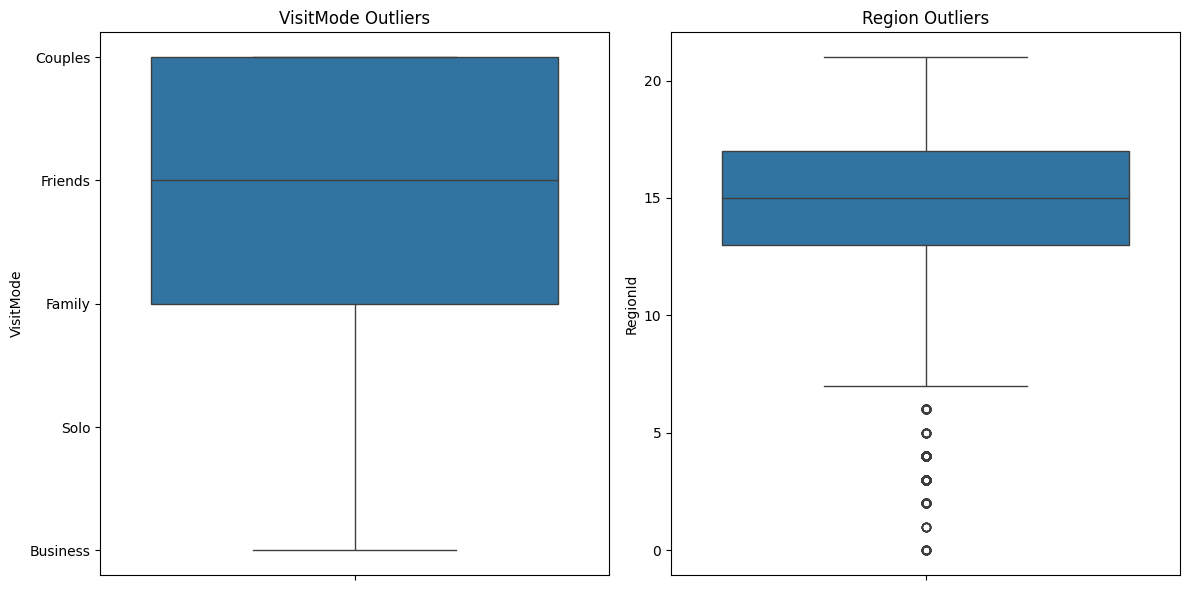

In [23]:
# Check for Outliers
plt.figure(figsize=(12, 6))

# First plot: Boxplot for VisitMode
plt.subplot(1, 2, 1)
sns.boxplot(merged['VisitMode'])
plt.title('VisitMode Outliers')

# Second plot: Boxplot for Region Outliers
plt.subplot(1, 2, 2)
sns.boxplot(merged['RegionId'])
plt.title('Region Outliers')

plt.tight_layout()
plt.show()

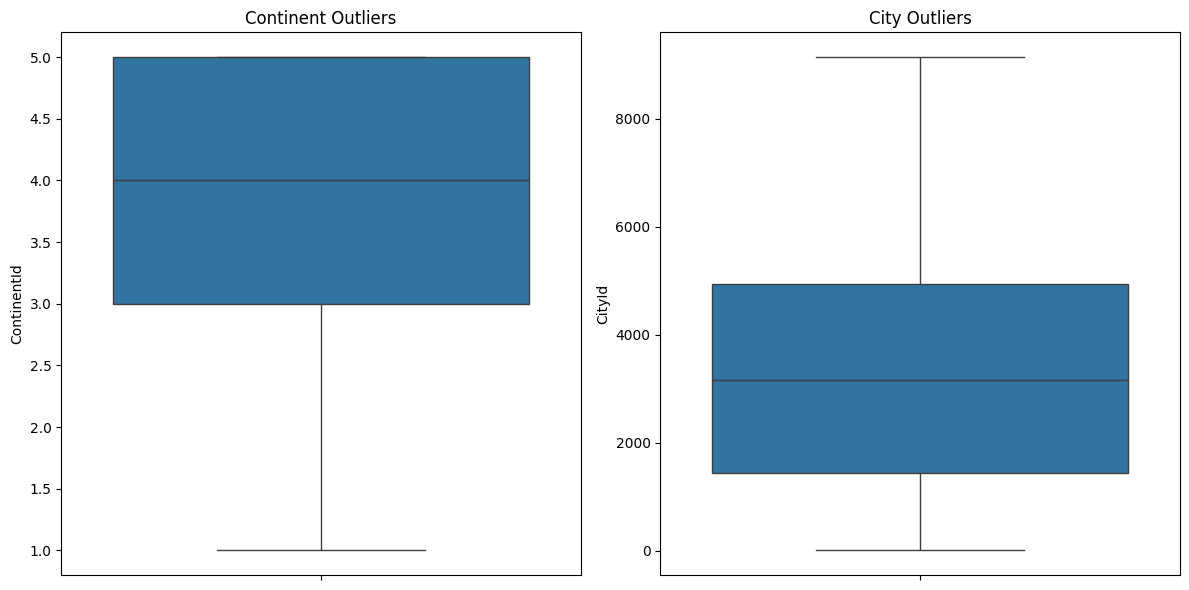

In [24]:
plt.figure(figsize=(12, 6))

# First plot: Boxplot for Continent Outlier
plt.subplot(1, 2, 1)
sns.boxplot(merged['ContinentId'])
plt.title('Continent Outliers')

# Second plot: Boxplot for finding City Outliers
plt.subplot(1, 2, 2)
sns.boxplot(merged['CityId'])
plt.title('City Outliers')

plt.tight_layout()
plt.show()

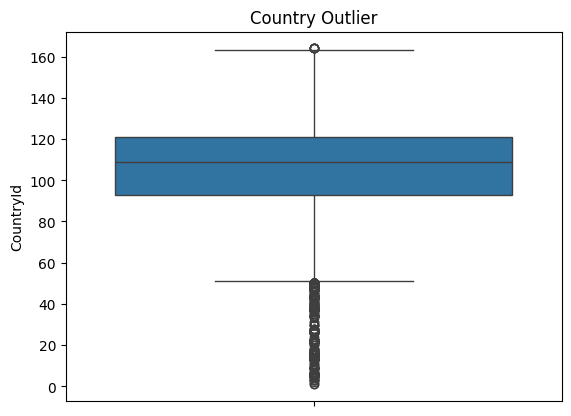

In [25]:
# Country Outlier
sns.boxplot(merged['CountryId'])
plt.title("Country Outlier")
plt.show()

In [26]:
# Eliminating Outliers
q1 = merged['RegionId'].quantile(0.25)
q3 = merged['RegionId'].quantile(0.75)
iqr = q3-q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
outlier = merged[(merged['RegionId']<lower)| (merged['RegionId']>upper)]
print(outlier[['RegionId','Region']]) 

       RegionId           Region
6             2      East Africa
8             4  Southern Africa
22            4  Southern Africa
37            3     North Africa
55            4  Southern Africa
...         ...              ...
51239         6        Caribbean
51240         6        Caribbean
51241         6        Caribbean
51576         5      West Africa
51668         4  Southern Africa

[1004 rows x 2 columns]


In [27]:
q1 = merged['CountryId'].quantile(0.25)
q3 = merged['CountryId'].quantile(0.75)
iqr = q3-q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
outlier = merged[(merged['CountryId']<lower)| (merged['CountryId']>upper)]
print(outlier[['CountryId','Country']]) 

       CountryId       Country
1             48        Canada
6              9      Tanzania
8             22  South Africa
22            22  South Africa
37            14         Egypt
...          ...           ...
52289         48        Canada
52531         48        Canada
52532         48        Canada
52593         48        Canada
52916         48        Canada

[2610 rows x 2 columns]


In [28]:
q1 = merged['RegionId'].quantile(0.25)
q3 = merged['RegionId'].quantile(0.75)
iqr = q3-q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
merged = merged[(merged['RegionId']>=lower)& (merged['RegionId']<=upper)]


q1 = merged['CountryId'].quantile(0.25)
q3 = merged['CountryId'].quantile(0.75)
iqr = q3-q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
merged = merged[(merged['CountryId']>=lower)& (merged['CountryId']<=upper)]


In [29]:
merged

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,VisitMode,ContinentId,RegionId,CountryId,CityId,Continent,Region,Country,CityName,VisitDate
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Couples,5,21,163,4341.0,Europe,Western Europe,United Kingdom,Guildford,2022-10-01
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Friends,2,8,48,464.0,America,Northern America,Canada,Ontario,2022-10-01
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Family,2,9,54,774.0,America,South America,Brazil,Brazil,2022-10-01
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Family,5,17,135,583.0,Europe,Central Europe,Switzerland,Zurich,2022-10-01
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Couples,5,21,163,1396.0,Europe,Western Europe,United Kingdom,Manchester,2022-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,Couples,5,21,159,7460.0,Europe,Western Europe,France,Lyon,2018-09-01
52926,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,Couples,5,17,133,6164.0,Europe,Central Europe,Slovakia,Bratislava Region,2016-02-01
52927,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,Couples,5,17,133,6164.0,Europe,Central Europe,Slovakia,Bratislava Region,2016-02-01
52928,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,Couples,5,17,133,6164.0,Europe,Central Europe,Slovakia,Bratislava Region,2016-02-01


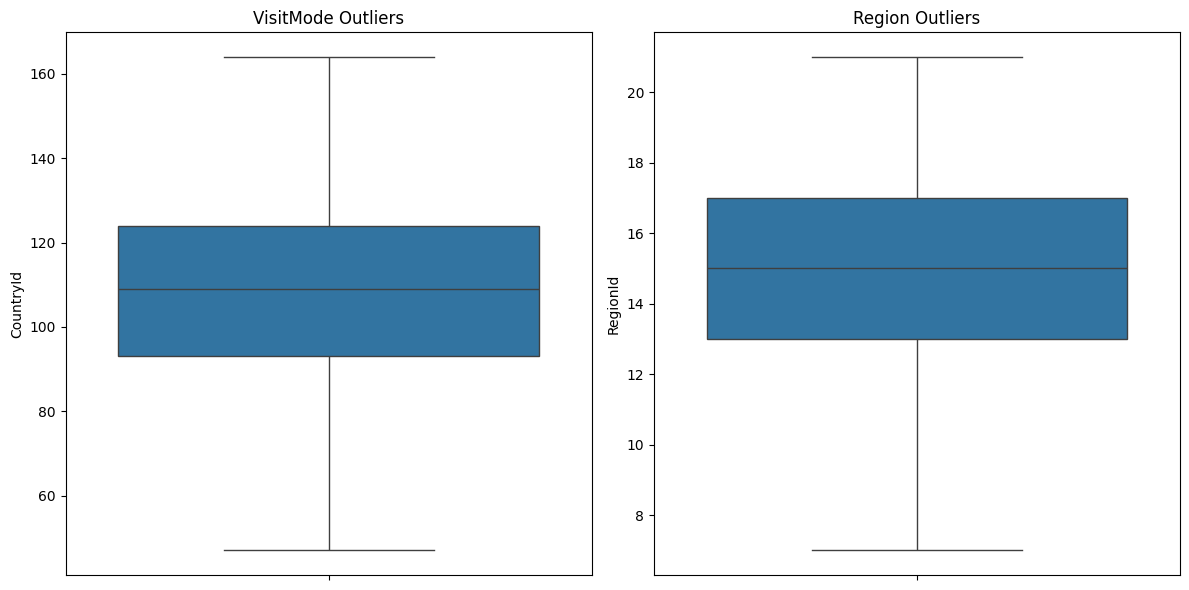

In [30]:

plt.figure(figsize=(12, 6))

# First plot: Boxplot for Country
plt.subplot(1, 2, 1)
sns.boxplot(merged['CountryId'])
plt.title('VisitMode Outliers')

# Second plot: Boxplot for Region
plt.subplot(1, 2, 2)
sns.boxplot(merged['RegionId'])
plt.title('Region Outliers')

plt.tight_layout()
plt.show()

In [31]:
#splitting columns into categorical and numerical
merged.dtypes

TransactionId                 int64
UserId                        int64
VisitYear                     int64
VisitMonth                    int64
VisitModeId                   int64
AttractionId                  int64
Rating                        int64
AttractionCityId              int64
AttractionTypeId              int64
Attraction                   object
AttractionAddress            object
VisitMode                    object
ContinentId                   int64
RegionId                      int64
CountryId                     int64
CityId                      float64
Continent                    object
Region                       object
Country                      object
CityName                     object
VisitDate            datetime64[ns]
dtype: object

In [32]:
#splitting into categorical and numerical columns
merged['AttractionTypeId'] = merged['AttractionTypeId'].astype(str)
numerical = merged.select_dtypes(include=['int64','float64']).columns
categorical = merged.select_dtypes(include=['object','category'] ).columns

In [33]:
print('numerical columns:',numerical)
print('categorical columns',categorical)

numerical columns: Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitModeId',
       'AttractionId', 'Rating', 'AttractionCityId', 'ContinentId', 'RegionId',
       'CountryId', 'CityId'],
      dtype='object')
categorical columns Index(['AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitMode',
       'Continent', 'Region', 'Country', 'CityName'],
      dtype='object')


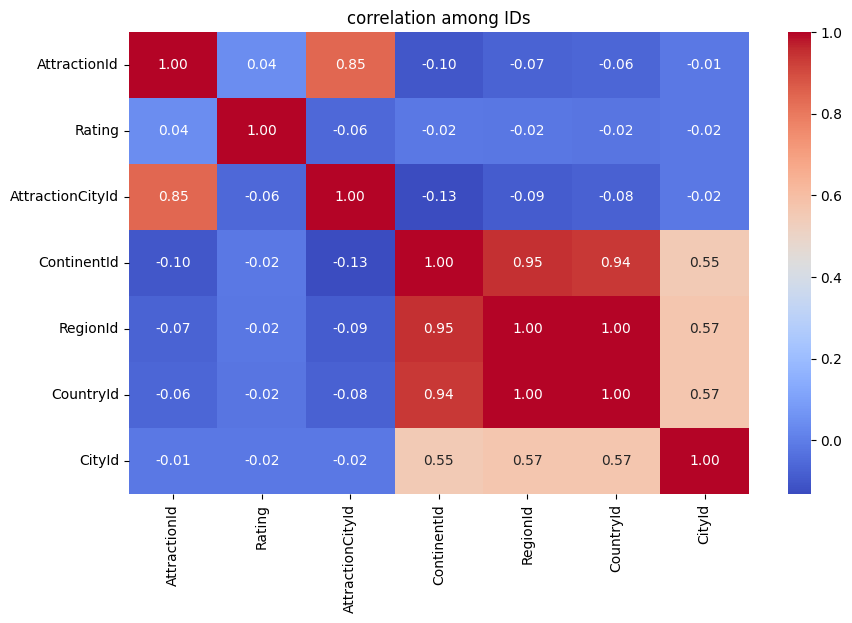

In [34]:
corr = ['AttractionId', 'Rating', 'AttractionCityId',
       'ContinentId', 'RegionId', 'CountryId', 'CityId']
corr_matrix = merged[corr].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt='.2f')
plt.title("correlation among IDs")
plt.show()

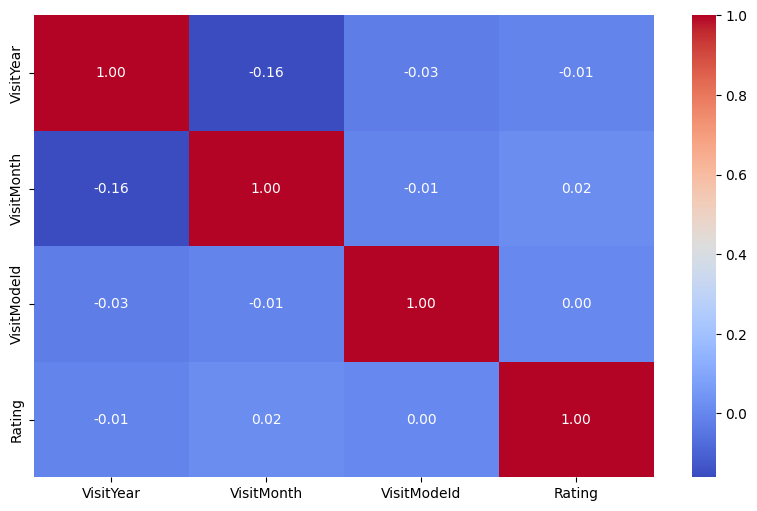

In [35]:
corr1 = ['VisitYear', 'VisitMonth', 'VisitModeId', 'Rating']
corr_matrix1 = merged[corr1].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix1, annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

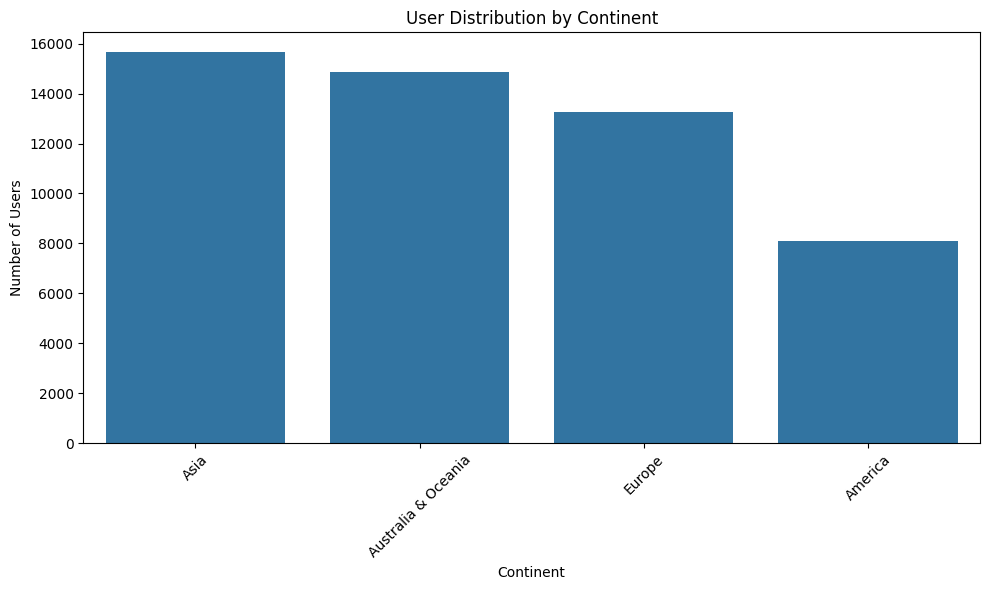

In [36]:
#User Distribuition among Continents
plt.figure(figsize=(10,6))
sns.countplot(data= merged,x=merged['Continent'],order=merged['Continent'].value_counts().index )
plt.title('User Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

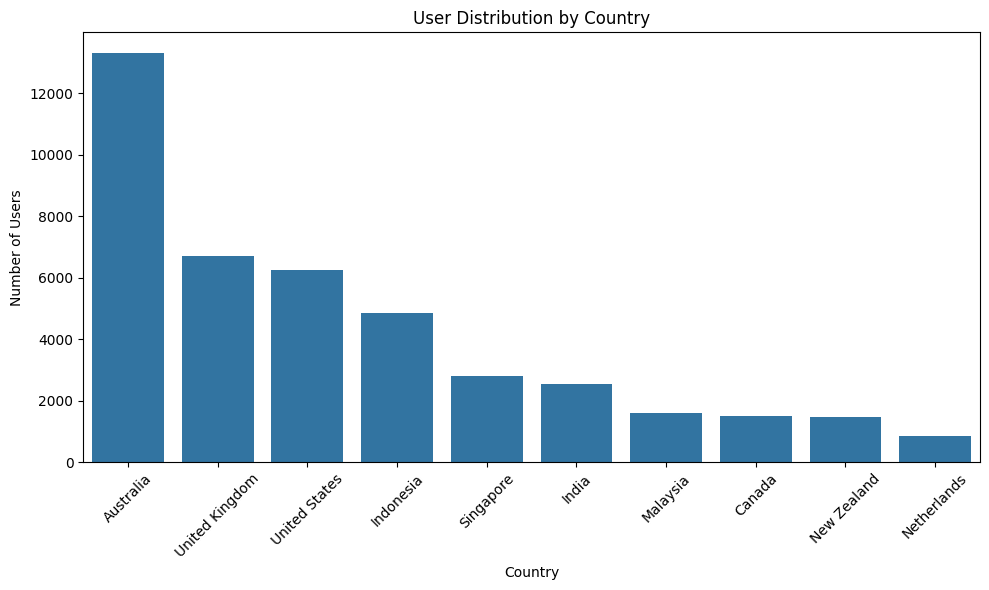

In [37]:
#User Distribution by Country
plt.figure(figsize=(10,6))
sns.countplot(data= merged,x=merged['Country'],order=merged['Country'].value_counts().head(10).index )
plt.title('User Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

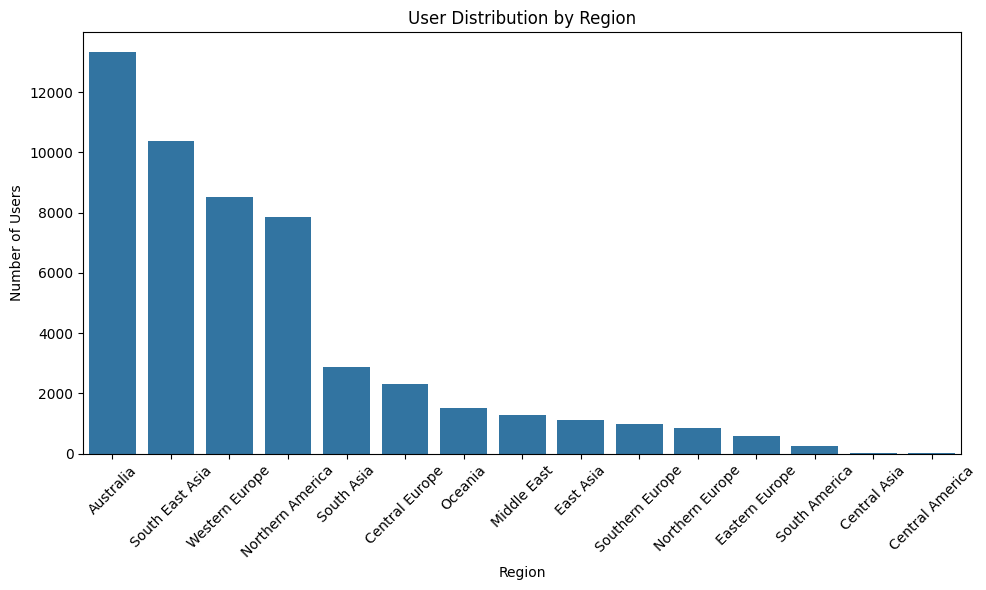

In [38]:
#Region Count
plt.figure(figsize=(10,6))
sns.countplot(data= merged,x=merged['Region'],order=merged['Region'].value_counts().index )
plt.title('User Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
merged_copy = merged.copy()
merged_copy.head(10)

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,VisitMode,ContinentId,RegionId,CountryId,CityId,Continent,Region,Country,CityName,VisitDate
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Couples,5,21,163,4341.0,Europe,Western Europe,United Kingdom,Guildford,2022-10-01
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Friends,2,8,48,464.0,America,Northern America,Canada,Ontario,2022-10-01
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Family,2,9,54,774.0,America,South America,Brazil,Brazil,2022-10-01
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Family,5,17,135,583.0,Europe,Central Europe,Switzerland,Zurich,2022-10-01
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Couples,5,21,163,1396.0,Europe,Western Europe,United Kingdom,Manchester,2022-10-01
5,18,43471,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Friends,2,8,51,1806.0,America,Northern America,United States,San Francisco,2022-10-01
7,23,20977,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Friends,5,21,163,8258.0,Europe,Western Europe,United Kingdom,Edinburgh,2022-10-01
9,29,62907,2022,9,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Couples,2,8,51,50.0,America,Northern America,United States,Alexandria,2022-09-01
10,31,86054,2022,9,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Couples,5,21,163,8809.0,Europe,Western Europe,United Kingdom,Rotherham,2022-09-01
11,33,41979,2022,9,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Couples,4,15,109,5365.0,Australia & Oceania,Australia,Australia,West Pennant Hills,2022-09-01


In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numerical features
merged[numerical] = scaler.fit_transform(merged[numerical])

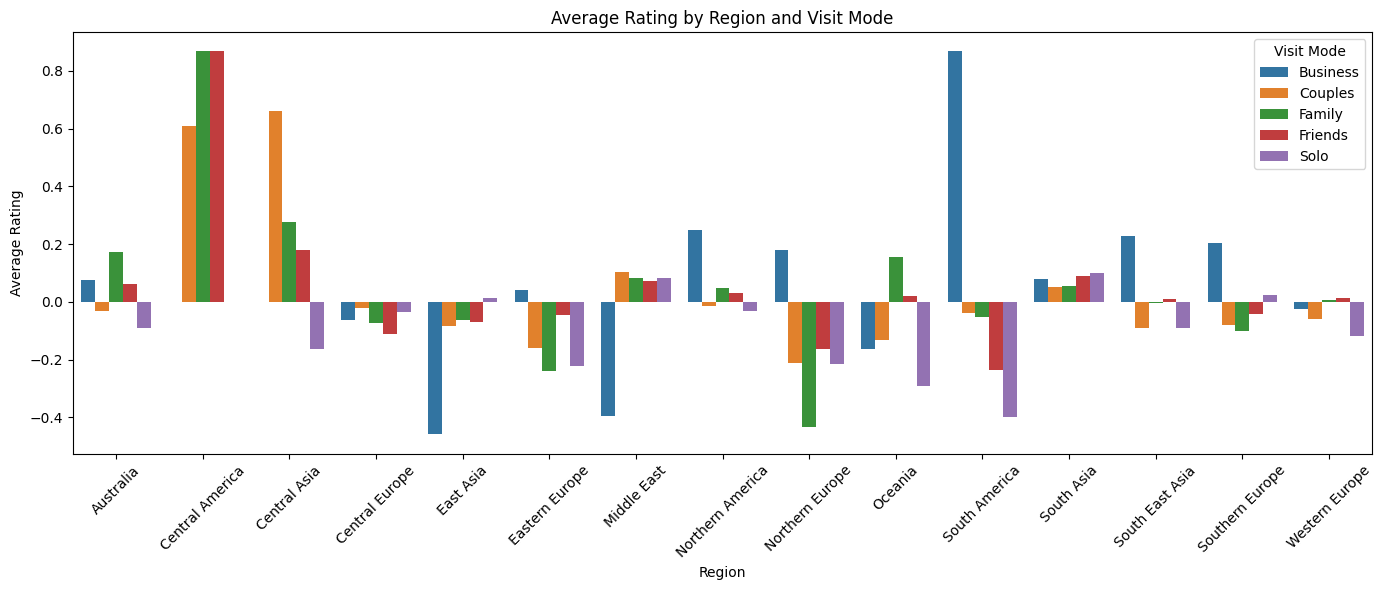

In [41]:
#Average Rating
region_visit_mode = merged.groupby(['Region','VisitMode']).agg(avg_rating=('Rating', 'mean'),user_count=('UserId', 'count')).reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data= region_visit_mode,x='Region',y='avg_rating',hue='VisitMode')
plt.title('Average Rating by Region and Visit Mode')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Visit Mode')
plt.tight_layout()
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_16032\2109932653.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AttractionTypeId', y='Rating', data=attraction_rating, palette='viridis')


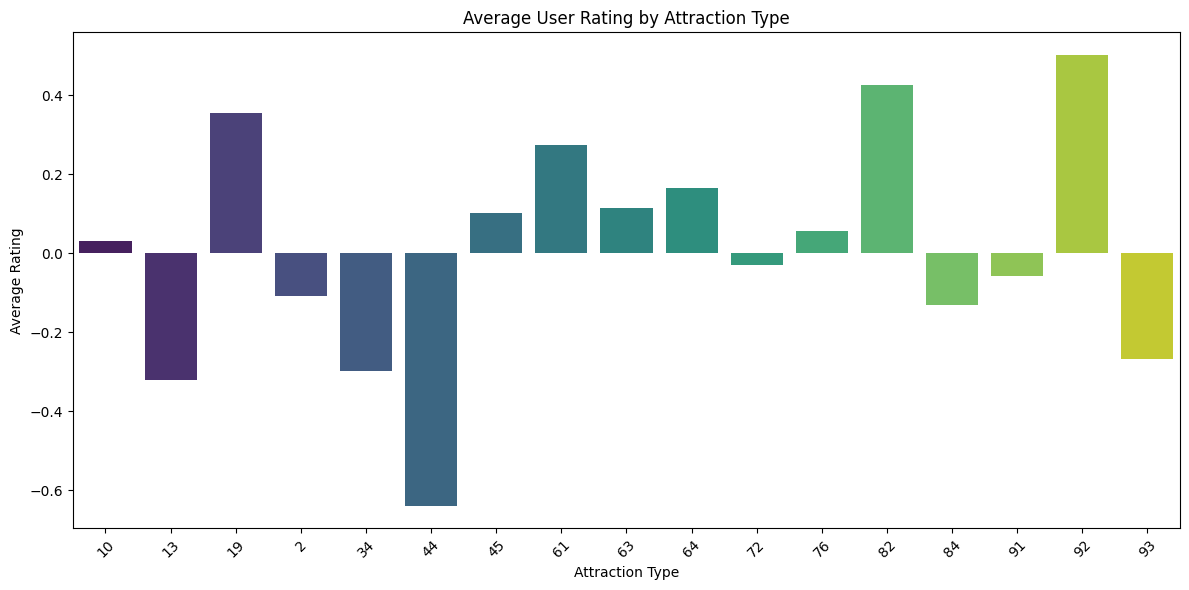

In [42]:
attraction_rating = merged.groupby('AttractionTypeId')['Rating'].mean()
attraction_rating = attraction_rating.reset_index()
attraction_rating = attraction_rating.sort_values('AttractionTypeId')

plt.figure(figsize=(12, 6))
sns.barplot(x='AttractionTypeId', y='Rating', data=attraction_rating, palette='viridis')
plt.title('Average User Rating by Attraction Type')
plt.xlabel('Attraction Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

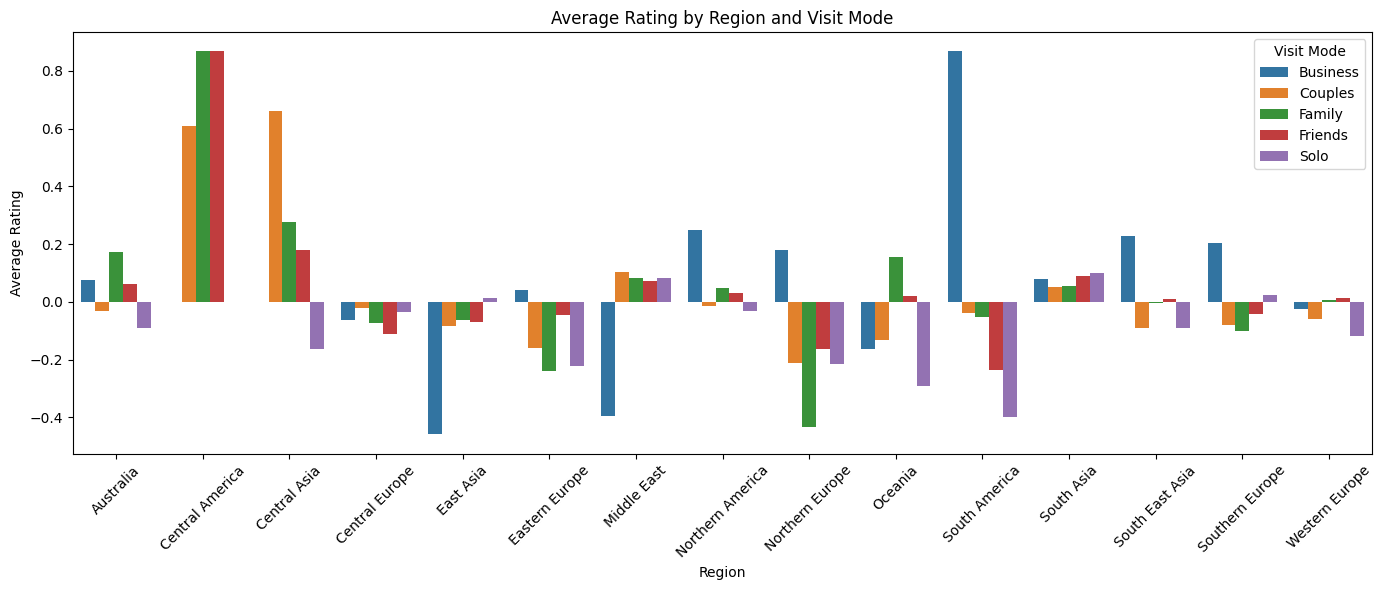

In [43]:
#Average Rating by Region and Visit Mode
region_visitmode_stats = merged.groupby(['Region', 'VisitMode']).agg(
    avg_rating=('Rating', 'mean'),
    user_count=('UserId', 'count')
).reset_index()

# Plot average rating
plt.figure(figsize=(14, 6))
sns.barplot(data=region_visitmode_stats, x='Region', y='avg_rating', hue='VisitMode')
plt.title('Average Rating by Region and Visit Mode')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Visit Mode')
plt.tight_layout()
plt.show()

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_16032\1910681298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attraction_counts.index, y=attraction_counts.values, palette='magma')


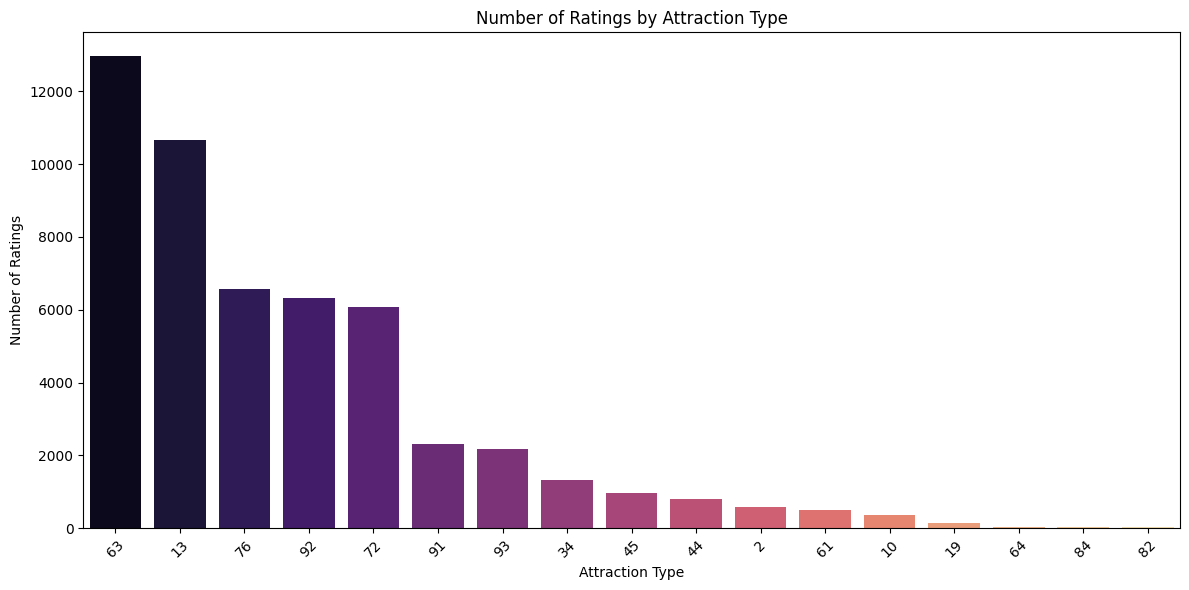

In [44]:

#Count of Ratings by Attraction Type (Popularity)
attraction_counts = merged['AttractionTypeId'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=attraction_counts.index, y=attraction_counts.values, palette='magma')
plt.title('Number of Ratings by Attraction Type')
plt.xlabel('Attraction Type')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

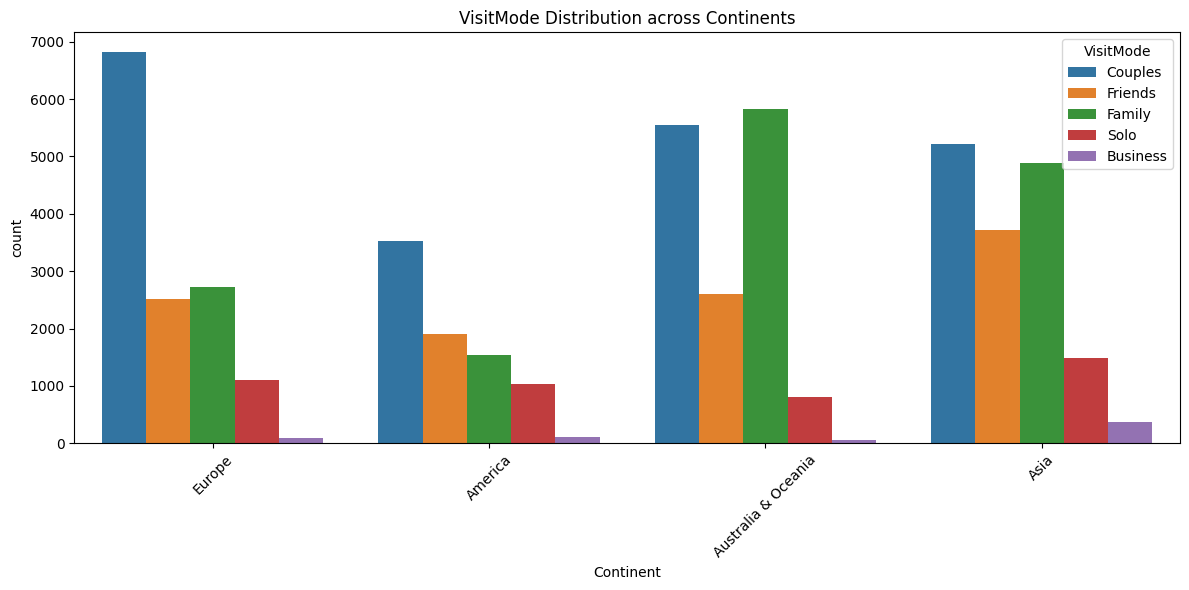

In [45]:
#VisitMode Distribution across Continents
plt.figure(figsize=(12, 6))
sns.countplot(data=merged, x='Continent', hue='VisitMode')
plt.title('VisitMode Distribution across Continents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:

visitmode_continent = pd.crosstab(merged['VisitMode'], merged['Continent'], normalize='index')
print(visitmode_continent)

Continent   America      Asia  Australia & Oceania    Europe
VisitMode                                                   
Business   0.163166  0.596123             0.088853  0.151858
Couples    0.166848  0.247028             0.263036  0.323088
Family     0.102988  0.325840             0.389074  0.182097
Friends    0.177046  0.345982             0.242775  0.234197
Solo       0.231986  0.336119             0.182065  0.249831


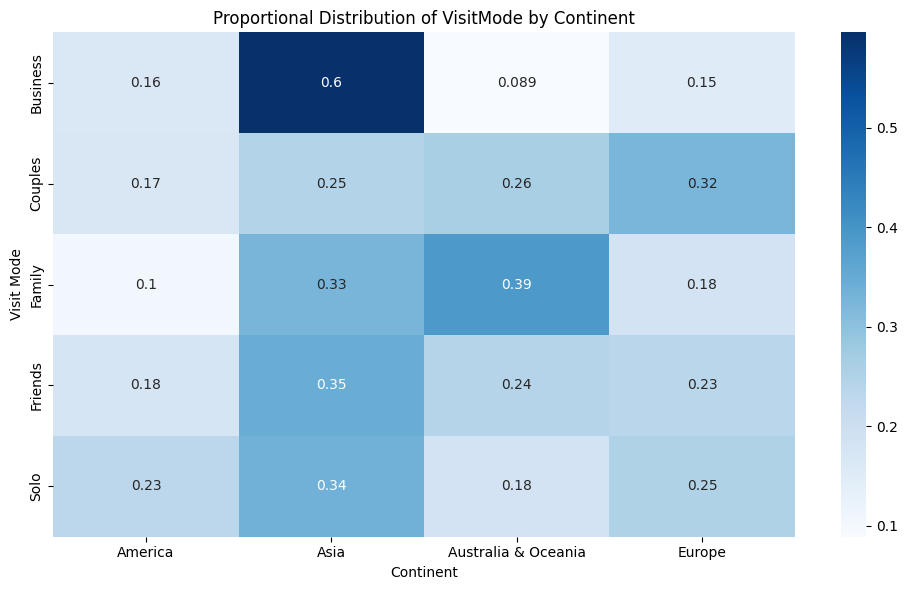

In [47]:
#Distribution of VisitMode by Continent
plt.figure(figsize=(10, 6))
sns.heatmap(visitmode_continent, annot=True, cmap='Blues')
plt.title('Proportional Distribution of VisitMode by Continent')
plt.ylabel('Visit Mode')
plt.xlabel('Continent')
plt.tight_layout()
plt.show()

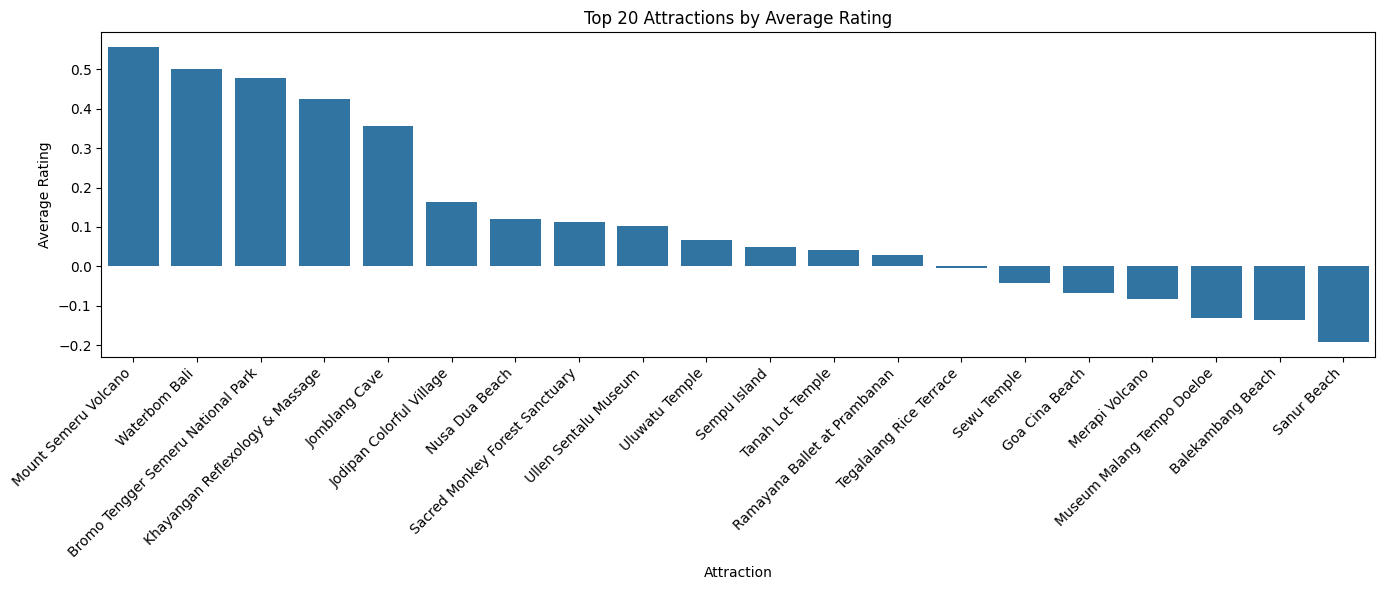

In [48]:

#Distribution of Ratings by Attraction
attraction_ratings = merged.groupby('Attraction')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=attraction_ratings.index[:20], y=attraction_ratings.values[:20])  # top 20 attractions
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Attractions by Average Rating")
plt.ylabel("Average Rating")
plt.xlabel("Attraction")
plt.tight_layout()
plt.show()
     

In [49]:
# Group by Attraction and get mean rating
top_rated = merged.groupby('Attraction')[['Rating']].mean().sort_values(by='Rating', ascending=False).head(10)
low_rated = merged.groupby('Attraction')[['Rating']].mean().sort_values(by='Rating').head(10)

print("Top 10 Rated Attractions:")
print(top_rated)

print("\n Bottom 10 Rated Attractions:")
print(low_rated)

Top 10 Rated Attractions:
                                      Rating
Attraction                                  
Mount Semeru Volcano                0.556500
Waterbom Bali                       0.501567
Bromo Tengger Semeru National Park  0.478694
Khayangan Reflexology & Massage     0.425162
Jomblang Cave                       0.355326
Jodipan Colorful Village            0.164020
Nusa Dua Beach                      0.120572
Sacred Monkey Forest Sanctuary      0.113454
Ullen Sentalu Museum                0.101686
Uluwatu Temple                      0.067293

 Bottom 10 Rated Attractions:
                            Rating
Attraction                        
Kuta Beach - Bali        -0.767621
Yogyakarta Palace        -0.639611
Malang City Square       -0.599108
Seminyak Beach           -0.366834
Water Castle (Tamansari) -0.354835
Kalibiru National Park   -0.322723
Malioboro Road           -0.298142
Tegenungan Waterfall     -0.269581
Ratu Boko Temple         -0.229793
Coban Rondo Waterf

# 3. Regression Model training

In [50]:
target = 'Rating'
#Features 
features = ['UserId','VisitYear', 'VisitMonth', 'VisitModeId', 'AttractionId',
    'AttractionCityId', 'ContinentId', 'RegionId', 'CountryId', 'CityId']
X = merged[features]
y = merged[target]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_test_standard,y_test)

#predict
y_pred = model.predict(X_test_standard)

In [54]:
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"MSE: {mse}")
print(f"\nMAE: {mae}")
print(f"\nrmse: {rmse}")
print(f"\nr2: {r2}")

MSE: 0.9626055242200262

MAE: 0.7718614144788541

rmse: 0.9811246221658216

r2: 0.03888508200924268


In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=150,max_depth=12,random_state=42,n_jobs=-1)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("Random Forest Metrics")
print(f"MSE: {mse}")
print(f"\nMAE: {mae}")
print(f"\nrmse: {rmse}")
print(f"\nr2: {r2}")

Random Forest Metrics
MSE: 0.8993190472405306

MAE: 0.7408327299770604

rmse: 0.9483243365223369

r2: 0.10207355911813643


In [56]:
#we need to do feature engineering 
user_avg_rating = merged_copy.groupby('UserId')['Rating'].mean().rename('UserAvgRating')
user_total_visit = merged_copy.groupby('UserId').size().rename('UserTotalVisit')
user_avg_rating


UserId
14       4.666667
16       4.700000
20       4.000000
25       5.000000
26       5.000000
           ...   
88179    2.000000
88185    4.200000
88187    5.000000
88189    3.500000
88190    5.000000
Name: UserAvgRating, Length: 32854, dtype: float64

In [57]:
user_total_visit

UserId
14        3
16       10
20        1
25        1
26        1
         ..
88179     1
88185     5
88187     1
88189     2
88190     1
Name: UserTotalVisit, Length: 32854, dtype: int64

In [58]:
merged_copy= merged_copy.merge(user_avg_rating,on='UserId')
merged_copy= merged_copy.merge(user_total_visit,on='UserId')

In [59]:
attr_avg_rating = merged_copy.groupby('AttractionId')['Rating'].mean().rename('AttractionAvgRating')
attr_total_visit = merged_copy.groupby('AttractionId').size().rename('AttractionTotalVisit')

In [60]:
# attr_total_visit,attr_avg_rating
merged_copy = merged_copy.merge(attr_avg_rating,on='AttractionId')
merged_copy = merged_copy.merge(attr_total_visit,on='AttractionId')

In [61]:
merged_copy

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,CityId,Continent,Region,Country,CityName,VisitDate,UserAvgRating,UserTotalVisit,AttractionAvgRating,AttractionTotalVisit
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,4341.0,Europe,Western Europe,United Kingdom,Guildford,2022-10-01,5.0,1,4.269144,12915
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,464.0,America,Northern America,Canada,Ontario,2022-10-01,5.0,1,4.269144,12915
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,774.0,America,South America,Brazil,Brazil,2022-10-01,5.0,1,4.269144,12915
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,583.0,Europe,Central Europe,Switzerland,Zurich,2022-10-01,3.0,2,4.269144,12915
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,1396.0,Europe,Western Europe,United Kingdom,Manchester,2022-10-01,3.0,3,4.269144,12915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51874,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,7460.0,Europe,Western Europe,France,Lyon,2018-09-01,3.0,4,3.538847,798
51875,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,6164.0,Europe,Central Europe,Slovakia,Bratislava Region,2016-02-01,4.5,4,3.538847,798
51876,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,6164.0,Europe,Central Europe,Slovakia,Bratislava Region,2016-02-01,4.5,4,3.538847,798
51877,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,6164.0,Europe,Central Europe,Slovakia,Bratislava Region,2016-02-01,4.5,4,3.538847,798


In [62]:
#combining visit mode and region 
merged_copy['VisitMode_Region'] = merged_copy['VisitMode']+'_'+merged_copy['Region']
merged_copy

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,Continent,Region,Country,CityName,VisitDate,UserAvgRating,UserTotalVisit,AttractionAvgRating,AttractionTotalVisit,VisitMode_Region
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Europe,Western Europe,United Kingdom,Guildford,2022-10-01,5.0,1,4.269144,12915,Couples_Western Europe
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,America,Northern America,Canada,Ontario,2022-10-01,5.0,1,4.269144,12915,Friends_Northern America
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,America,South America,Brazil,Brazil,2022-10-01,5.0,1,4.269144,12915,Family_South America
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Europe,Central Europe,Switzerland,Zurich,2022-10-01,3.0,2,4.269144,12915,Family_Central Europe
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Europe,Western Europe,United Kingdom,Manchester,2022-10-01,3.0,3,4.269144,12915,Couples_Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51874,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,Europe,Western Europe,France,Lyon,2018-09-01,3.0,4,3.538847,798,Couples_Western Europe
51875,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,Europe,Central Europe,Slovakia,Bratislava Region,2016-02-01,4.5,4,3.538847,798,Couples_Central Europe
51876,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,Europe,Central Europe,Slovakia,Bratislava Region,2016-02-01,4.5,4,3.538847,798,Couples_Central Europe
51877,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,Europe,Central Europe,Slovakia,Bratislava Region,2016-02-01,4.5,4,3.538847,798,Couples_Central Europe


In [63]:
merged_copy['VisitMonth'] = merged_copy['VisitDate'].dt.month
merged_copy['VisitDay'] = merged_copy['VisitDate'].dt.day
merged_copy['VisitDayofWeek'] = merged_copy['VisitDate'].dt.day_of_week
# Extract month and day features
merged_copy

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,Country,CityName,VisitDate,UserAvgRating,UserTotalVisit,AttractionAvgRating,AttractionTotalVisit,VisitMode_Region,VisitDay,VisitDayofWeek
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,United Kingdom,Guildford,2022-10-01,5.0,1,4.269144,12915,Couples_Western Europe,1,5
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Canada,Ontario,2022-10-01,5.0,1,4.269144,12915,Friends_Northern America,1,5
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,Brazil,Brazil,2022-10-01,5.0,1,4.269144,12915,Family_South America,1,5
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,Switzerland,Zurich,2022-10-01,3.0,2,4.269144,12915,Family_Central Europe,1,5
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,United Kingdom,Manchester,2022-10-01,3.0,3,4.269144,12915,Couples_Western Europe,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51874,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,France,Lyon,2018-09-01,3.0,4,3.538847,798,Couples_Western Europe,1,5
51875,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,Slovakia,Bratislava Region,2016-02-01,4.5,4,3.538847,798,Couples_Central Europe,1,0
51876,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,Slovakia,Bratislava Region,2016-02-01,4.5,4,3.538847,798,Couples_Central Europe,1,0
51877,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,Slovakia,Bratislava Region,2016-02-01,4.5,4,3.538847,798,Couples_Central Europe,1,0


In [64]:
# User's average rating per VisitMode
user_visitmode_avg = merged_copy.groupby(['UserId', 'VisitMode'])['Rating'].mean().unstack().fillna(0)
user_visitmode_avg.columns = [f'UserAvgRating_{col}' for col in user_visitmode_avg.columns]
merged_copy = merged_copy.merge(user_visitmode_avg, on='UserId', how='left')

In [65]:
categorical_cols = ['VisitMode', 'Region', 'Country', 'Continent', 'AttractionTypeId', 'VisitMode_Region']
df_encoded = pd.get_dummies(merged_copy, columns=categorical_cols, drop_first=True)
     

drop_cols = ['TransactionId', 'UserId', 'Attraction', 'AttractionAddress', 'CityName', 'VisitDate']

df_encoded.select_dtypes(include=['object']).columns

Index(['Attraction', 'AttractionAddress', 'CityName'], dtype='object')

In [66]:
df_model = df_encoded.drop(columns=drop_cols, errors='ignore')

In [67]:
df_model.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [68]:
df_model.drop(columns= ['VisitMode_Region'], errors='ignore')

,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,ContinentId,RegionId,CountryId,CityId,...,VisitMode_Region_Solo_Eastern Europe,VisitMode_Region_Solo_Middle East,VisitMode_Region_Solo_Northern America,VisitMode_Region_Solo_Northern Europe,VisitMode_Region_Solo_Oceania,VisitMode_Region_Solo_South America,VisitMode_Region_Solo_South Asia,VisitMode_Region_Solo_South East Asia,VisitMode_Region_Solo_Southern Europe,VisitMode_Region_Solo_Western Europe
0,2022,10,2,640,5,1,5,21,163,4341.0,...,False,False,False,False,False,False,False,False,False,False
1,2022,10,4,640,5,1,2,8,48,464.0,...,False,False,False,False,False,False,False,False,False,False
2,2022,10,3,640,5,1,2,9,54,774.0,...,False,False,False,False,False,False,False,False,False,False
3,2022,10,3,640,3,1,5,17,135,583.0,...,False,False,False,False,False,False,False,False,False,False
4,2022,10,2,640,3,1,5,21,163,1396.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51874,2018,9,2,1297,4,3,5,21,159,7460.0,...,False,False,False,False,False,False,False,False,False,False
51875,2016,2,2,1297,5,3,5,17,133,6164.0,...,False,False,False,False,False,False,False,False,False,False
51876,2016,2,2,1297,4,3,5,17,133,6164.0,...,False,False,False,False,False,False,False,False,False,False
51877,2016,2,2,1297,4,3,5,17,133,6164.0,...,False,False,False,False,False,False,False,False,False,False


In [69]:
# Separate features and target
X = df_model.drop('Rating', axis=1)
y = df_model['Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression  Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Decision Tree Regression  Metrics:
Mean Squared Error (MSE): 0.4594
Mean Absolute Error (MAE): 0.2976
Root Mean Squared Error (RMSE): 0.6778
R² Score: 0.5070


In [72]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=150,max_depth=12,random_state=42,n_jobs=-1)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("Random Forest Metrics")
print(f"MSE: {mse}")
print(f"\nMAE: {mae}")
print(f"\nrmse: {rmse}")
print(f"\nr2: {r2}")

Random Forest Metrics
MSE: 0.23218185972144065

MAE: 0.24689800037233436

rmse: 0.48185252901841313

r2: 0.7508516035807725


# 4. Classification Model Training

In [73]:
merged_copy

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,AttractionCityId,AttractionTypeId,Attraction,...,AttractionAvgRating,AttractionTotalVisit,VisitMode_Region,VisitDay,VisitDayofWeek,UserAvgRating_Business,UserAvgRating_Couples,UserAvgRating_Family,UserAvgRating_Friends,UserAvgRating_Solo
0,3,70456,2022,10,2,640,5,1,63,Sacred Monkey Forest Sanctuary,...,4.269144,12915,Couples_Western Europe,1,5,0.0,5.0,0.0,0.0,0.0
1,8,7567,2022,10,4,640,5,1,63,Sacred Monkey Forest Sanctuary,...,4.269144,12915,Friends_Northern America,1,5,0.0,0.0,0.0,5.0,0.0
2,9,79069,2022,10,3,640,5,1,63,Sacred Monkey Forest Sanctuary,...,4.269144,12915,Family_South America,1,5,0.0,0.0,5.0,0.0,0.0
3,10,31019,2022,10,3,640,3,1,63,Sacred Monkey Forest Sanctuary,...,4.269144,12915,Family_Central Europe,1,5,0.0,0.0,3.0,0.0,0.0
4,15,43611,2022,10,2,640,3,1,63,Sacred Monkey Forest Sanctuary,...,4.269144,12915,Couples_Western Europe,1,5,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51874,211227,87100,2018,9,2,1297,4,3,44,Yogyakarta Palace,...,3.538847,798,Couples_Western Europe,1,5,0.0,3.0,0.0,0.0,0.0
51875,211238,88112,2016,2,2,1297,5,3,44,Yogyakarta Palace,...,3.538847,798,Couples_Central Europe,1,0,0.0,4.5,0.0,0.0,0.0
51876,211239,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,3.538847,798,Couples_Central Europe,1,0,0.0,4.5,0.0,0.0,0.0
51877,211240,88112,2016,2,2,1297,4,3,44,Yogyakarta Palace,...,3.538847,798,Couples_Central Europe,1,0,0.0,4.5,0.0,0.0,0.0


In [74]:
#saving the data 
merged_copy.to_csv("preprocessed_dataset.csv", index=False)

In [75]:
df_classification = merged_copy.copy()

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
target = 'VisitMode'

# Features
features = ['ContinentId', 'Region', 'Country', 'CityId',
            'AttractionTypeId', 'VisitYear', 'VisitMonth']

# Handle categorical encoding
for col in features + [target]:
    if df_classification[col].dtype == 'object':
        le = LabelEncoder()
        df_classification[col] = le.fit_transform(df_classification[col])

X = df_classification[features]
y = df_classification[target]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [78]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.21      0.26       128
           1       0.53      0.62      0.57      4243
           2       0.50      0.49      0.49      2997
           3       0.36      0.31      0.34      2114
           4       0.32      0.22      0.26       894

    accuracy                           0.48     10376
   macro avg       0.41      0.37      0.38     10376
weighted avg       0.47      0.48      0.47     10376

Confusion Matrix:
 [[  27   31   29   32    9]
 [  14 2626  819  598  186]
 [  16 1005 1466  393  117]
 [  21  870  456  661  106]
 [   3  383  165  144  199]]


In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [80]:
categorical_cols = [ 'Region', 'Country', 'Continent', 'AttractionTypeId', 'VisitMode_Region']
df_enc = pd.get_dummies(merged_copy, columns=categorical_cols, drop_first=True)

In [81]:
df_enc.select_dtypes(include=['object']).columns

Index(['Attraction', 'AttractionAddress', 'VisitMode', 'CityName'], dtype='object')

In [82]:
X = df_enc.drop('VisitMode', axis=1)  # Features
y = df_enc['VisitMode']               # Target (encoded: 0,1,2,...)

In [83]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (SVM is sensitive to feature scale!)
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

#need the scaled data back in the original DataFrame:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

In [84]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Business       0.99      0.96      0.98       124
     Couples       1.00      1.00      1.00      4223
      Family       1.00      1.00      1.00      2999
     Friends       1.00      1.00      1.00      2145
        Solo       1.00      1.00      1.00       885

    accuracy                           1.00     10376
   macro avg       1.00      0.99      0.99     10376
weighted avg       1.00      1.00      1.00     10376


Confusion Matrix:
[[ 119    5    0    0    0]
 [   1 4221    1    0    0]
 [   0    1 2993    5    0]
 [   0    0    2 2143    0]
 [   0    0    0    4  881]]


In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Business       0.91      0.95      0.93       124
     Couples       0.97      0.98      0.98      4223
      Family       0.95      0.95      0.95      2999
     Friends       0.96      0.95      0.95      2145
        Solo       0.96      0.94      0.95       885

    accuracy                           0.96     10376
   macro avg       0.95      0.95      0.95     10376
weighted avg       0.96      0.96      0.96     10376


Confusion Matrix:
[[ 118    6    0    0    0]
 [   8 4130   81    4    0]
 [   3  101 2851   43    1]
 [   0   10   61 2044   30]
 [   0    0    8   49  828]]


In [86]:
#KNN Performs the best among the 3

# 5. Recommodation Task

1) Collaborative Filtering

In [110]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# 1. Load and create sparse matrix
df = merged_copy
df = df[['UserId', 'AttractionId', 'Rating']]

# Optional: Filter only users with at least 5 ratings
active_users = df['UserId'].value_counts()
df = df[df['UserId'].isin(active_users[active_users >= 1].index)]


df

,UserId,AttractionId,Rating
0,70456,640,5
1,7567,640,5
2,79069,640,5
3,31019,640,3
4,43611,640,3
...,...,...,...
51874,87100,1297,4
51875,88112,1297,5
51876,88112,1297,4
51877,88112,1297,4


In [112]:
user_item_df = df.pivot_table(index='UserId', columns='AttractionId', values='Rating').fillna(0)



# 3. Compute sparse cosine similarity
user_similarity = cosine_similarity(user_item_df, dense_output=False)  # still efficient for 50K users


MemoryError: Unable to allocate 8.04 GiB for an array with shape (32854, 32854) and data type float64

In [105]:
def recommendation(user_id, top_n=5):
    if user_id not in user_id_to_index:
        return f"User {user_id} not found."

    idx = user_id_to_index[user_id]
    
    # Sparse vector to dense row
    sim_row = user_similarity[idx].toarray().flatten()
    sim_row[idx] = 0  # exclude self

    # Top similar users
    top_users = sim_row.argsort()[::-1][:5]
    top_weights = sim_row[top_users]

    # Weighted score calculation
    weighted = np.zeros(user_item_matrix.shape[1])
    for i, sim in zip(top_users, top_weights):
        weighted += user_item_matrix[i].toarray().flatten() * sim

    # Remove rated items
    rated = user_item_matrix[idx].toarray().flatten()
    weighted[rated > 0] = 0

    # Top recommendations
    top_items = weighted.argsort()[::-1][:top_n]
    return user_item_df.columns[top_items].tolist()



In [106]:
recommendations = recommendation(70456, top_n=5)
print("Recommended Attraction IDs:", recommendations)

Recommended Attraction IDs: User 70456 not found.


In [ ]:
from surprise import Dataset, SVD
print("scikit-surprise is working!")

scikit-surprise is working!


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

#  Load the CSV file 
df = pd.read_csv("preprocessed_dataset.csv")


required_columns = {"UserId", "AttractionId", "Rating"}


reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["UserId", "AttractionId", "Rating"]], reader)

#Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

#Train the SVD model
model = SVD()
model.fit(trainset)

# Predict and evaluate
predictions = model.test(testset)
print(" Collaborative Filtering RMSE:", accuracy.rmse(predictions))
print("Collaborative Filtering MAE:", accuracy.mae(predictions))

RMSE: 0.9118
 Collaborative Filtering RMSE: 0.9117587879481012
MAE:  0.7139
Collaborative Filtering MAE: 0.7138889119051175


In [ ]:
user_id = 12345  

# Getting all attractions user hasn't rated
rated_items = df[df["UserId"] == user_id]["AttractionId"].unique()
all_items = df["AttractionId"].unique()
unseen_items = [item for item in all_items if item not in rated_items]

# Predicting scores for unseen attractions
preds = [model.predict(user_id, item) for item in unseen_items]
top_preds = sorted(preds, key=lambda x: x.est, reverse=True)[:5]

print("Top 5 Recommendations:")
for p in top_preds:
    name = df[df["AttractionId"] == p.iid]["Attraction"].iloc[0]
    print(f"{name} → Predicted Rating: {p.est:.2f}")

Top 5 Recommendations:
Mount Semeru Volcano → Predicted Rating: 4.72
Bromo Tengger Semeru National Park → Predicted Rating: 4.64
Waterbom Bali → Predicted Rating: 4.61
Khayangan Reflexology & Massage → Predicted Rating: 4.47
Jomblang Cave → Predicted Rating: 4.47


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Encode AttractionTypeId and Country
if "AttractionType_Encoded" not in df.columns:
    le_type = LabelEncoder()
    df["AttractionType_Encoded"] = le_type.fit_transform(df["AttractionTypeId"].astype(str))
if "UserCountry_Encoded" not in df.columns:
    le_country = LabelEncoder()
    df["UserCountry_Encoded"] = le_country.fit_transform(df["Country"].astype(str))

item_features = df.groupby("AttractionId")[["AttractionType_Encoded", "UserCountry_Encoded"]].mean()
similarity_matrix = cosine_similarity(item_features)

# Recommend similar attractions for a given attraction
attraction_id = 640 
index = item_features.index.get_loc(attraction_id)
similar_scores = list(enumerate(similarity_matrix[index]))
sorted_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:6]

print("Attractions similar to:", df[df["AttractionId"] == attraction_id]["Attraction"].iloc[0])
for idx, score in sorted_scores:
    similar_id = item_features.index[idx]
    name = df[df["AttractionId"] == similar_id]["Attraction"].iloc[0]
    print(f"{name} → Similarity: {score:.2f}")


Attractions similar to: Sacred Monkey Forest Sanctuary
Bromo Tengger Semeru National Park → Similarity: 1.00
Water Castle (Tamansari) → Similarity: 1.00
Sempu Island → Similarity: 1.00
Tegalalang Rice Terrace → Similarity: 1.00
Kalibiru National Park → Similarity: 1.00


In [ ]:
import pickle

# Save regression model (RandomForestRegressor from cell 71)
pickle.dump(rf_model, open("regression_model.pkl", "wb"))

# Save classification model (KNeighborsClassifier from cell 85)
pickle.dump(knn, open("knn_classifier.pkl", "wb"))


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Rating_Scaled", "Avg_Rating_User_Scaled"]] = scaler.fit_transform(df[["Rating", "AttractionAvgRating"]])

In [ ]:
import pandas as pd
import mysql.connector
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345'
)
connection.autocommit=True
cursor=connection.cursor()
data_base=("Create database tourism_db")
cursor.execute(data_base)
print("Data_Base Created Successfully")
cursor.close()
connection.close()

DatabaseError: 1007 (HY000): Can't create database 'tourism_db'; database exists

In [ ]:
# Step 1: Connect to MySQL
import csv
connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database= 'tourism_db'
)
cursor = connection.cursor()

# Step 2: Open and read the CSV
with open('preprocessed_dataset.csv', 'r', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file)
    header = next(csv_reader)  # skip header if exists

    # Optional: Create table dynamically (once)
    cursor.execute(f"""
        CREATE TABLE IF NOT EXISTS your_table (
            {', '.join([f"{col} TEXT" for col in header])}
        )
    """)

    # Step 3: Insert data row-by-row
    for row in csv_reader:
        placeholders = ','.join(['%s'] * len(row))
        sql = f"INSERT INTO your_table ({', '.join(header)}) VALUES ({placeholders})"
        cursor.execute(sql, row)

# Step 4: Commit and close
connection.commit()
cursor.close()
connection.close()

print("CSV imported into MySQL successfully!")

CSV imported into MySQL successfully!
